# cross-section results
after applying the correction for $\phi_\mu \sim 0$ and $\phi_p \sim 0$

In [5]:
import sys; sys.path.insert(0, '../../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [6]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/'

In [7]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected overlay files from , loading them...
9538 selected CC1p events overlay
found  462 selected on beam and 15 beam off events...
found selected genie CC1p...


# cross-section with weights-crossing

In [8]:
extract_Xsecs(do_corr_phi_0=True, debug=0, particle='mu',
                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                  extra_name="cross-weights",do_cross_weights=True)

saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PmuXsecs_1Dcross-weights.txt


In [9]:
extract_Xsecs(do_corr_phi_0=True, debug=0, particle='p',
                  selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,
                  selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                  extra_name="cross-weights",do_cross_weights=True)

saved cross-sections into /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/1d_Xsec/PpXsecs_1Dcross-weights.txt


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_without_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_with_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_without_last_ctu_bin_cross-weights.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/AN-XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_with_last_ctu_bin_cross-weights.pdf


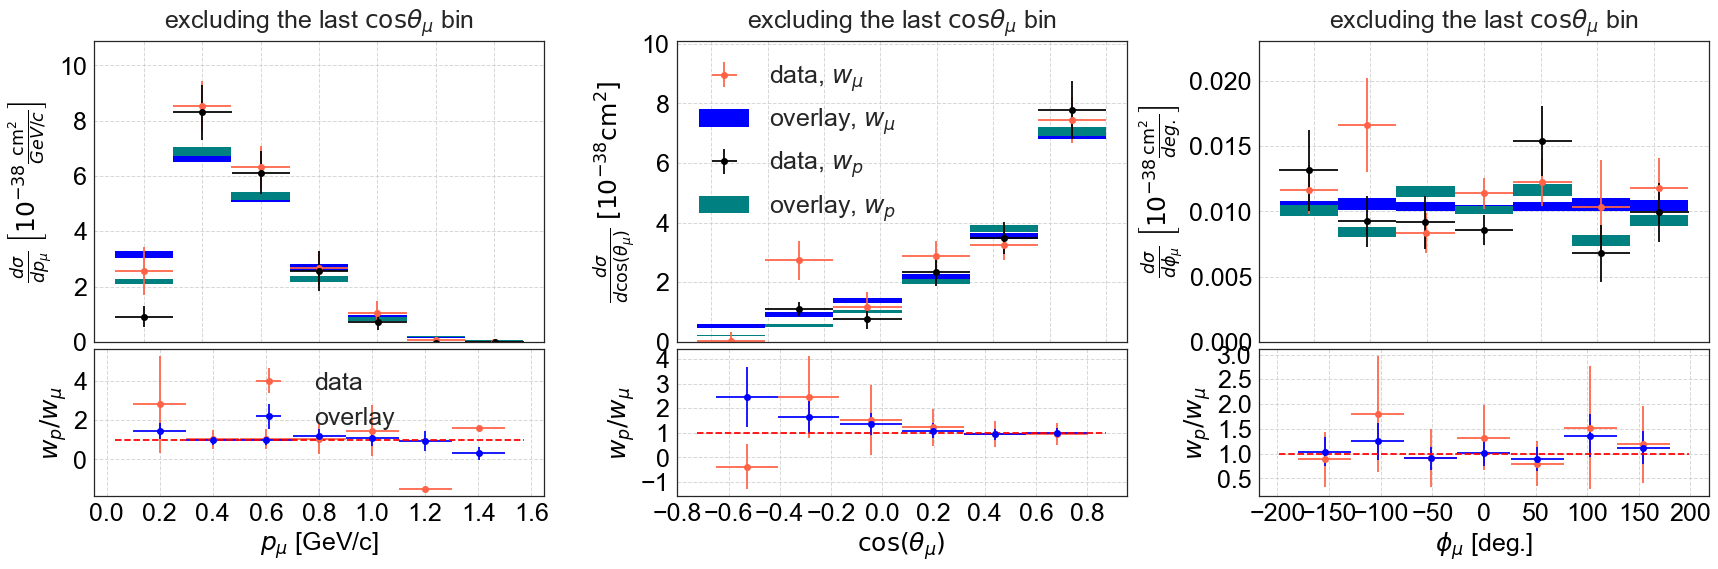

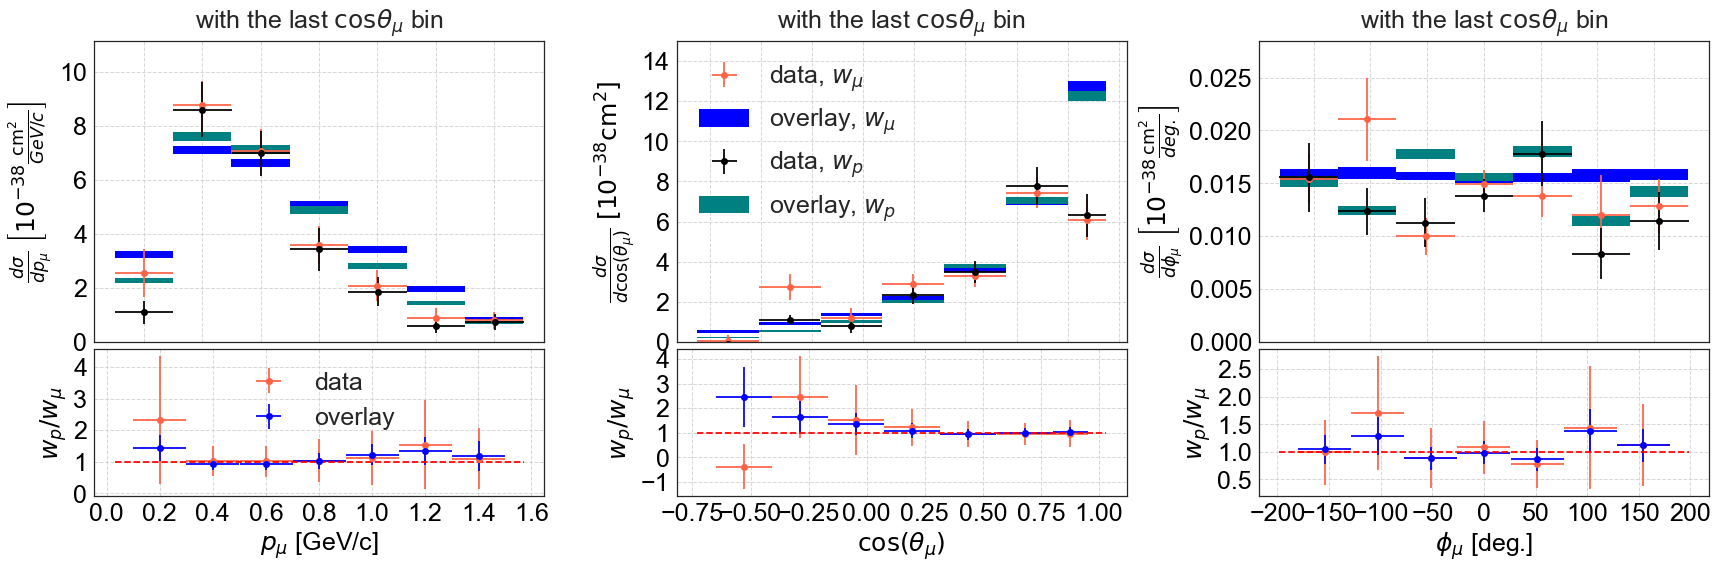

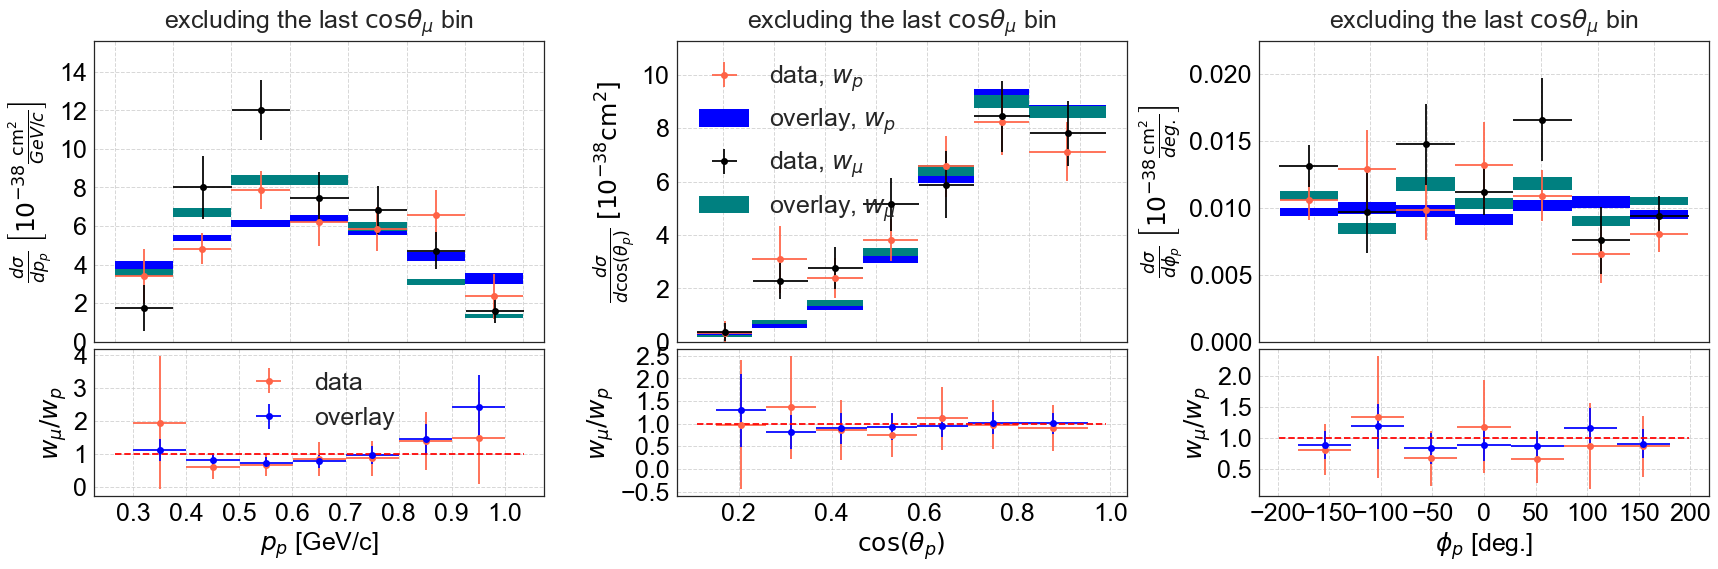

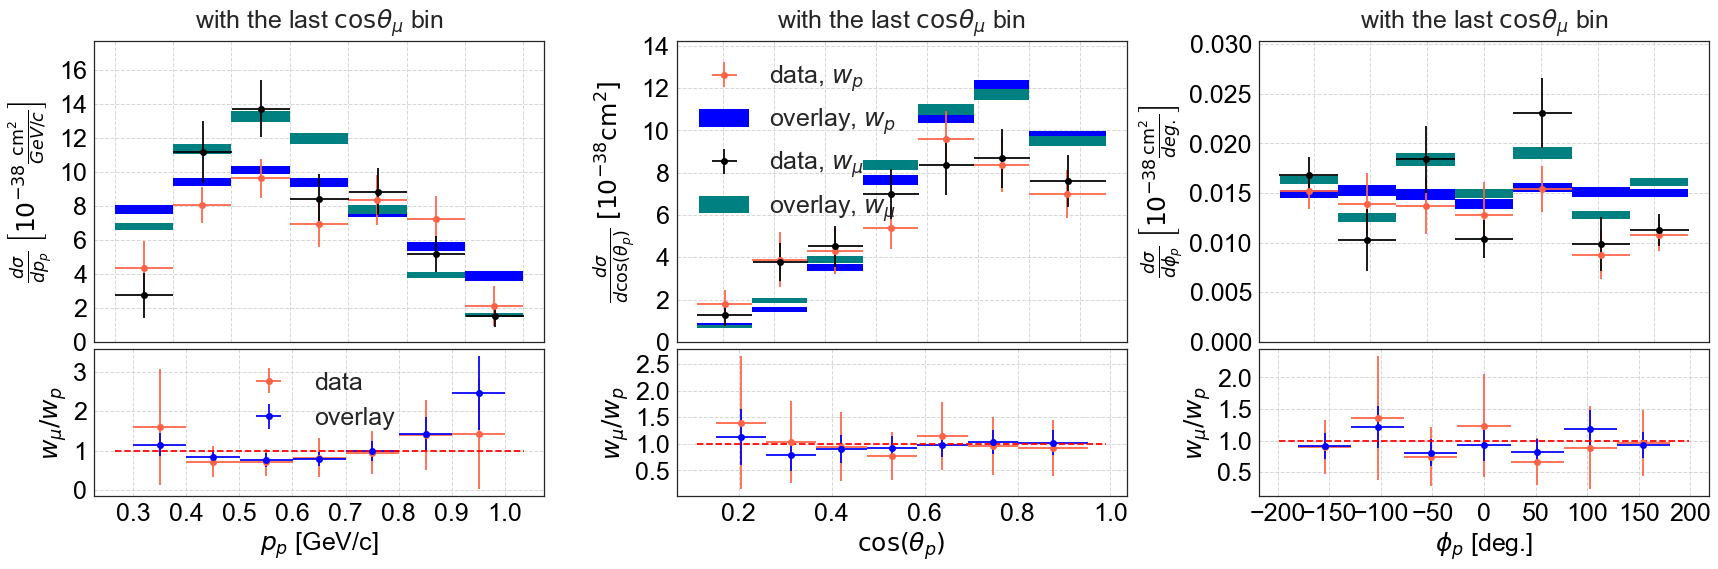

In [17]:
for particle,pname,other_pname in zip(['mu','p'],['\mu','p'],['p','\mu']):
    
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile:#{
        nominal_Xsec_dicts = pickle.load(infile)
    #}
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1Dcross-weights.txt", 'rb') as infile:#{
        cross_weights_Xsec_dicts = pickle.load(infile)
    #}
    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        fig=plt.figure(figsize=(24,8))            
        for i,(observable,ivar) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')'],[(1,4),(2,5),(3,6)])):#{
            var,vtrue,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = nominal_Xsec_dicts[Xsec_title][observable],nominal_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = nominal_Xsec_dicts[Xsec_title]['mc '+observable], nominal_Xsec_dicts[Xsec_title]['mc '+observable+' err']
            h['Xsec cross_weight'],h['Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title][observable],cross_weights_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec cross_weight'],h['mc Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title]['mc '+observable], cross_weights_Xsec_dicts[Xsec_title]['mc '+observable+' err']

            ax = fig.add_subplot(3,3,ivar)
            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                h['Xsec cross_weight']=h['Xsec cross_weight'][:-1];h['Xsec cross_weight err']=h['Xsec cross_weight err'][:-1]
                h['mc Xsec cross_weight']=h['mc Xsec cross_weight'][:-1];h['mc Xsec cross_weight err']=h['mc Xsec cross_weight err'][:-1]

            ax = fig.add_subplot(3,3,ivar)        
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data, $w_'+pname+'$')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'],label='overlay, $w_'+pname+'$') 

            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['Xsec cross_weight'],yerr=h['Xsec cross_weight err'],color='black',fmt='o',label='data, $w_'+other_pname+'$')
            ax.bar( x=mid , height=2*h['mc Xsec cross_weight err'], bottom=h['mc Xsec cross_weight']-h['mc Xsec cross_weight err'], width=bin_width, color='teal',label='overlay, $w_'+other_pname+'$') 
            set_axes(ax,'',y_label=get_Xsec_label(vlabel=vlabel,units=units),remove_ticks_x=True
                             ,do_add_grid=True,do_add_legend=True if 'cos_theta' in var else False
                             ,ylim=(0,1.1*np.max(ax.get_ylim())),title=Xsec_title
                            )
            
            # ratios of normal to cross-weights
            h['nominal/cross_weight'] = h['Xsec']/h['Xsec cross_weight']
            h['nominal/cross_weight err'] = h['nominal/cross_weight']* np.sqrt(h['Xsec err']/h['Xsec'] + h['Xsec cross_weight err']/h['Xsec cross_weight'])
            h['mc nominal/cross_weight'] = h['mc Xsec']/h['mc Xsec cross_weight']
            h['mc nominal/cross_weight err'] = h['mc nominal/cross_weight']* np.sqrt(h['mc Xsec err']/h['mc Xsec'] + h['mc Xsec cross_weight err']/h['mc Xsec cross_weight'])
            ax = fig.add_subplot(3,3,7+i) 
            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['nominal/cross_weight'],yerr=h['nominal/cross_weight err'],color=Colors['beam on'],fmt='o',label='data')
            plt.errorbar(x=mid*1.001,xerr=0.5*bin_width,y=h['mc nominal/cross_weight'],yerr=h['mc nominal/cross_weight err'],color=Colors['CC1p'],fmt='o',label='overlay')
            plt.plot(ax.get_xlim(),[1,1],'--',color='red')
            set_axes(ax,xlabel,y_label='$w_'+other_pname+'/w_'+pname+'$'                 
                     ,do_add_grid=True
                     ,do_add_legend=True if i==0 else False,legend_loc='upper center'
                            )

        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)
        save_figure(figures_path + 'Xsec_1D_P'+particle + '_' + Xsec_fname + '_cross-weights.pdf')

In [18]:
Xsec_sys_unc = dict()
for particle in ['mu','p']:
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1D.txt", 'rb') as infile: nominal_Xsec_dicts = pickle.load(infile)
    with open(Paths['1d Xsec'] + "P" +particle + "Xsecs_1Dcross-weights.txt", 'rb') as infile: cross_weights_Xsec_dicts = pickle.load(infile)

    for iXsec,(Xsec_title,Xsec_fname) in enumerate(zip(Xsec_ctu_titles,Xsec_fnames)):#{
        for i,observable in enumerate(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']
                                     ):#{
            var,vture,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            h = dict()
            h['Xsec'],h['Xsec err'] = nominal_Xsec_dicts[Xsec_title][observable],nominal_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec'],h['mc Xsec err'] = nominal_Xsec_dicts[Xsec_title]['mc '+observable], nominal_Xsec_dicts[Xsec_title]['mc '+observable+' err']
            h['Xsec cross_weight'],h['Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title][observable],cross_weights_Xsec_dicts[Xsec_title][observable+' err']
            h['mc Xsec cross_weight'],h['mc Xsec cross_weight err'] = cross_weights_Xsec_dicts[Xsec_title]['mc '+observable], cross_weights_Xsec_dicts[Xsec_title]['mc '+observable+' err']

            if iXsec==0 and var=='reco_Pmu_cos_theta':
                mid=mid[:-1]; bin_width=bin_width[:-1]; bins=bins[:-1]
                h['Xsec']=h['Xsec'][:-1];h['Xsec err']=h['Xsec err'][:-1]
                h['mc Xsec']=h['mc Xsec'][:-1];h['mc Xsec err']=h['mc Xsec err'][:-1]
                h['Xsec cross_weight']=h['Xsec cross_weight'][:-1];h['Xsec cross_weight err']=h['Xsec cross_weight err'][:-1]
                h['mc Xsec cross_weight']=h['mc Xsec cross_weight'][:-1];h['mc Xsec cross_weight err']=h['mc Xsec cross_weight err'][:-1]
                
            Xsec_sys_unc[var + Xsec_fname + ' Xsec sys. err'] = 0.5*np.abs(h['Xsec cross_weight'] - h['Xsec'])
#             print var + Xsec_fname + ' Xsec sys. err',h['Xsec cross_weight'],h['Xsec']

In [12]:
Xsec_sys_unc

{'reco_Pmu_cos_thetawith_last_ctu_bin Xsec sys. err': array([ 0.07508671,  0.81444538,  0.20242691,  0.26733289,  0.10803151,
         0.16566842,  0.12495907]),
 'reco_Pmu_cos_thetawithout_last_ctu_bin Xsec sys. err': array([ 0.07508671,  0.81444538,  0.20242691,  0.26733289,  0.10803151,
         0.16566842]),
 'reco_Pmu_mcs_phiwith_last_ctu_bin Xsec sys. err': array([  5.90908843e-05,   4.36189234e-03,   6.53453504e-04,
          5.57436424e-04,   1.99374981e-03,   1.81818567e-03,
          7.03542384e-04]),
 'reco_Pmu_mcs_phiwithout_last_ctu_bin Xsec sys. err': array([ 0.00073554,  0.00368538,  0.0004122 ,  0.00139968,  0.00156531,
         0.00178949,  0.00093772]),
 'reco_Pmu_mcswith_last_ctu_bin Xsec sys. err': array([ 0.72362335,  0.08055327,  0.04167001,  0.07203027,  0.11062581,
         0.15504422,  0.03396345]),
 'reco_Pmu_mcswithout_last_ctu_bin Xsec sys. err': array([ 0.82535924,  0.11051982,  0.10304386,  0.05656032,  0.1690083 ,
         0.04929637,  0.00255823]),
 'rec

In [13]:
outfilename = Paths['systematics'] + "decoupling_2x3D_systemaitcal_uncertainty.txt"
with open(outfilename, 'w') as outfile:
    outfile.write(pickle.dumps(Xsec_sys_unc))
print 'saved',outfilename

saved /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/systematics/decoupling_2x3D_systemaitcal_uncertainty.txt
